In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

In [146]:
Data=pd.read_csv("DATATHON_COTTON.csv")
Data

YEAR-MO-DY  Cloud cover  Speed(2m)  Temperature  Temp_max  Temp_range  \
0       1/1/2000        135.6       2.26        24.98     30.12        9.77   
1       1/2/2000        136.2       2.80        24.91     30.23       10.34   
2       1/3/2000        133.1       2.63        25.07     30.36        9.97   
3       1/4/2000        142.5       3.28        25.36     30.83       10.53   
4       1/5/2000        145.5       3.26        24.26     30.70       13.47   
...          ...          ...        ...          ...       ...         ...   
8763  12/29/2023       -999.0       1.42        23.80     26.06        3.94   
8764  12/30/2023       -999.0       1.65        23.83     26.56        4.47   
8765  12/31/2023       -999.0       2.32        23.62     27.81        6.57   
8766    1/1/2024       -999.0       2.66        21.29     23.25        3.09   
8767         NaN          NaN        NaN          NaN       NaN         NaN   

      Temp_min  Relative humidity  Precipitation  Wind (10m)  \
0        20.35          59.000000           0.16        2.73   
1        19.90          57.500000           0.00        3.36   
2        20.39          58.810000           0.00        3.16   
3        20.30          49.690000           0.00        3.95   
4        17.23          48.690000           0.00        3.95   
...        ...                ...            ...         ...   
8763     22.12          70.940000           2.46        1.70   
8764     22.09          70.620000           2.16        1.98   
8765     21.24          73.940000           5.34        2.71   
8766     20.16          84.190000          12.49        3.19   
8767       NaN          63.966463            NaN         NaN   

      Wind(10)mDirection  Soil_wetness    Yeilds  
0                 166.25          0.41  20.18750  
1                 163.94          0.41  19.99250  
2                 169.38          0.41  20.21500  
3                  88.25          0.40  19.30125  
4                 164.44          0.39  18.62375  
...                  ...           ...       ...  
8763              232.50       -999.00  21.56000  
8764              162.62       -999.00  21.48875  
8765              161.00       -999.00  22.67750  
8766              179.88       -999.00  24.62375  
8767                 NaN           NaN       NaN  

[8768 rows x 13 columns]

In [147]:
Data.head()

YEAR-MO-DY  Cloud cover  Speed(2m)  Temperature  Temp_max  Temp_range  \
0   1/1/2000        135.6       2.26        24.98     30.12        9.77   
1   1/2/2000        136.2       2.80        24.91     30.23       10.34   
2   1/3/2000        133.1       2.63        25.07     30.36        9.97   
3   1/4/2000        142.5       3.28        25.36     30.83       10.53   
4   1/5/2000        145.5       3.26        24.26     30.70       13.47   

   Temp_min  Relative humidity  Precipitation  Wind (10m)  Wind(10)mDirection  \
0     20.35              59.00           0.16        2.73              166.25   
1     19.90              57.50           0.00        3.36              163.94   
2     20.39              58.81           0.00        3.16              169.38   
3     20.30              49.69           0.00        3.95               88.25   
4     17.23              48.69           0.00        3.95              164.44   

   Soil_wetness    Yeilds  
0          0.41  20.18750  
1          0.41  19.99250  
2          0.41  20.21500  
3          0.40  19.30125  
4          0.39  18.62375

In [148]:
Data.dropna(inplace=True)

In [149]:
x = Data[['Temperature','Precipitation']]
y = Data[["Yeilds"]]

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
x,y, test_size=0.2,
    
)


With this line of code ;one is able to split the data into two portions one for prediction and the othe to test ath a 4:1 ratio.

In [151]:
X_train

Temperature  Precipitation
5735        25.75           0.41
7976        23.16           8.75
8084        22.04          13.27
6258        25.47           5.24
1297        22.85           2.43
...           ...            ...
416         24.80           2.41
7409        22.59           2.41
6671        22.03           9.67
4375        23.17           3.97
3428        21.88           5.80

[7013 rows x 2 columns]

In [152]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [153]:
y_pred=(model.predict(X_test))

In [154]:
y_test_values=(y_test)

In [155]:
y_pred_values=(y_pred)

In [156]:
column_array = Data['Yeilds'].values


In [157]:
print(y_test.shape)
print(y_pred.shape)

(1754, 1)
(1754, 1)


In [158]:
# Ensure y_test and y_pred are 1-dimensional arrays
y_test_values = y_test.squeeze()
y_pred_values = y_pred.squeeze()

# Construct DataFrame
df = pd.DataFrame({"Actual": y_test_values, "Prediction": y_pred_values})


In [159]:
df

Actual  Prediction
663   23.29125   23.002595
5297  19.60000   20.045670
7905  19.18500   19.963452
6191  20.49625   20.102322
2785  21.33875   21.434106
...        ...         ...
8322  20.10875   20.482849
2391  19.86375   20.266123
8415  18.84125   20.070281
5464  20.87875   20.798550
4921  19.56750   20.317891

[1754 rows x 2 columns]

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Compute R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 0.36415027388938354
Mean Absolute Error: 0.4781119873253827
R-squared: 0.935105021859369


In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
y_pred = model.predict(X_test)

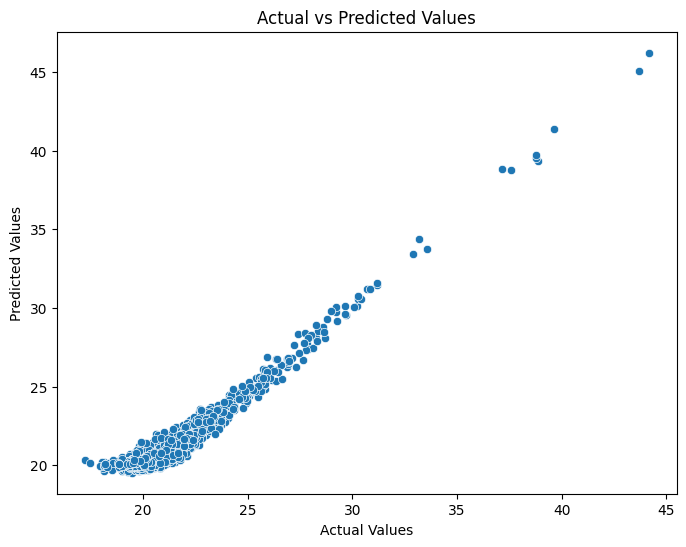

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten())
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


With the model above we are able to predict rainfall values and the temperature values for the farmers to be able plan there schedules accordingly and try to maintain a regular yeild production even with changing climate

In [164]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [165]:
def predict_yields(model, input_data):
    input_data = np.array(input_data)
    input_data = input_data.reshape(1, -1)
    return model.predict(input_data)

In [166]:
user_input = [22, 43]
prediction = predict_yields(model, user_input)
print("Prediction:", prediction)

Prediction: [[32.32955643]]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
